<a href="https://colab.research.google.com/github/p25-c4/kerly_project/blob/main/0317_SG_%EC%A7%80%EC%97%B0%EC%9C%A8_%EC%8B%A0%EA%B7%9C%EA%B3%A0%EA%B0%9D_RFM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# !apt-get update -qq
# !apt-get install fonts-nanum* -qq
# !rm ~/.cache/matplotlib -rf

In [2]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

# 한글폰트 설정
mpl.rc("font",family = "NanumGothic")
mpl.rc("axes", unicode_minus = False)

In [3]:
import os
os.chdir("/content/drive/MyDrive/BigData/early_project")

# Data load

In [4]:
kurly = pd.read_csv("kurly.csv")
kurly.head()

,idUser,idOrder,OrderDT,ItemCode,Price,DeliveryDT,Delay_YN,ItemLargeCode,ItemLargeName,ItemMiddleCode,...,Date,Year,Month,Day,Hour,CleanedItemName,TimeBetweenOrders,Combined,Weekday,WeekdayName
0,U10001,U10001-O2021-1001,2021-12-03 20:59:27,L1-M12-S0070-1113,17030,2021-12-04 03:26:00,0,L1,가공식품,M12,...,2021-12-03,2021,12,3,20,이츠웰 후르츠칵테일 과일통조림 3k 슬라이스,3 days 09:06:40,"20s, 여성, 2",4,Friday
1,U10001,U10001-O2021-1001,2021-12-03 20:59:27,L1-M15-S0140-1247,7680,2021-12-04 03:26:00,0,L1,가공식품,M15,...,2021-12-03,2021,12,3,20,베지가든 수제교자만두 매콤한 김치맛 720g 360gx2개입,3 days 09:06:40,"20s, 여성, 2",4,Friday
2,U10001,U10001-O2021-1001,2021-12-03 20:59:27,L1-M23-S0580-1047,12420,2021-12-04 03:26:00,0,L1,가공식품,M23,...,2021-12-03,2021,12,3,20,매일유업 매일 상하치즈 피자용 모짜렐라 슈레드치즈 200gx5봉,3 days 09:06:40,"20s, 여성, 2",4,Friday
3,U10001,U10001-O2021-1001,2021-12-03 20:59:27,L4-M12-S0640-1010,6250,2021-12-04 03:26:00,0,L4,신선식품,M12,...,2021-12-03,2021,12,3,20,계양구 배달 싱싱한 방울토마토 750g 작전 과일나라,3 days 09:06:40,"20s, 여성, 2",4,Friday
4,U10001,U10001-O2021-1001,2021-12-03 20:59:27,L4-M17-S0130-1018,14450,2021-12-04 03:26:00,0,L4,신선식품,M17,...,2021-12-03,2021,12,3,20,낙지호롱 900g 20 25개 낙지꼬치구이 냉동낙지 양념소스70gx1팩 제공,3 days 09:06:40,"20s, 여성, 2",4,Friday


In [5]:
# 날짜데이터들 형식 변경
kurly['Date'] = pd.to_datetime(kurly['Date'])
kurly['DeliveryDT'] = pd.to_datetime(kurly['DeliveryDT'])
kurly['OrderDT'] = pd.to_datetime(kurly['OrderDT'])

kurly['Date_Delivery'] = pd.to_datetime(kurly['DeliveryDT'].dt.strftime('%Y-%m-%d')) # 도착날짜 연-월-일 형식으로 추가
kurly['Delivery_diff_Order'] = kurly['Date_Delivery'] - kurly['Date'] # 도착날짜 - 주문날짜(days)
kurly[['OrderDT', 'DeliveryDT', 'Delivery_diff_Order']].head()

,OrderDT,DeliveryDT,Delivery_diff_Order
0,2021-12-03 20:59:27,2021-12-04 03:26:00,1 days
1,2021-12-03 20:59:27,2021-12-04 03:26:00,1 days
2,2021-12-03 20:59:27,2021-12-04 03:26:00,1 days
3,2021-12-03 20:59:27,2021-12-04 03:26:00,1 days
4,2021-12-03 20:59:27,2021-12-04 03:26:00,1 days


In [6]:
# 배송 요일 추가
# 요일 추출 (월요일=0, 일요일=6)
kurly['Weekday_Delivery'] = kurly['DeliveryDT'].dt.weekday
# 숫자 요일을 문자열 요일로 매핑
weekday_map = {0: 'Monday', 1: 'Tuesday', 2: 'Wednesday', 3: 'Thursday', 4: 'Friday', 5: 'Saturday', 6: 'Sunday'}
kurly['WeekdayName_Delivery'] = kurly['Weekday_Delivery'].map(weekday_map)
# order_user = order_user.drop(columns='Weekday')

kurly[['DeliveryDT','WeekdayName_Delivery']]

,DeliveryDT,WeekdayName_Delivery
0,2021-12-04 03:26:00,Saturday
1,2021-12-04 03:26:00,Saturday
2,2021-12-04 03:26:00,Saturday
3,2021-12-04 03:26:00,Saturday
4,2021-12-04 03:26:00,Saturday
...,...,...
1018706,2023-04-12 04:36:00,Wednesday
1018707,2023-04-12 04:36:00,Wednesday
1018708,2023-04-12 04:36:00,Wednesday
1018709,2023-04-12 04:36:00,Wednesday


## 요일별 배송지연율

In [7]:
grouped_data = kurly.groupby('WeekdayName_Delivery')['Delay_YN'].value_counts(normalize=True).rename("percentage").reset_index()
grouped_data.sort_values(by=['percentage'])

,WeekdayName_Delivery,Delay_YN,percentage
5,Saturday,1,0.034701
11,Wednesday,1,0.039852
3,Monday,1,0.041396
1,Friday,1,0.041583
7,Thursday,1,0.043329
9,Tuesday,1,0.043547
8,Tuesday,0,0.956453
6,Thursday,0,0.956671
0,Friday,0,0.958417
2,Monday,0,0.958604


|   |월|화|수|목|금|토|
|---|---|---|---|---|---|---|
|배송지연율(%)|4.14|4.36|3.99|4.33|4.16|3.47|

- 토요일의 배송지연율이 낮다(약 3.47%)
- 평균(4.1%) 대비 84% 수준
- 화요일(4.36%) 대비 80% 수준
- 원인??


In [8]:
# 요일별 매출
weekday_q = kurly.groupby('WeekdayName')['idOrder'].count().reset_index()
weekday_q

,WeekdayName,idOrder
0,Friday,126732
1,Monday,143335
2,Saturday,9539
3,Sunday,219884
4,Thursday,177005
5,Tuesday,158020
6,Wednesday,184196


<Axes: xlabel='WeekdayName', ylabel='idOrder'>

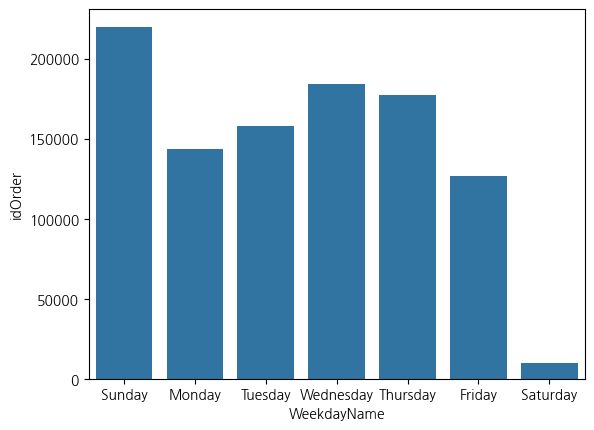

In [9]:
sns.barplot(data=weekday_q, x='WeekdayName', y='idOrder',
             order=['Sunday','Monday','Tuesday','Wednesday','Thursday','Friday','Saturday'])

- 도착 전 날 매출과는 크게 관련 없는 듯

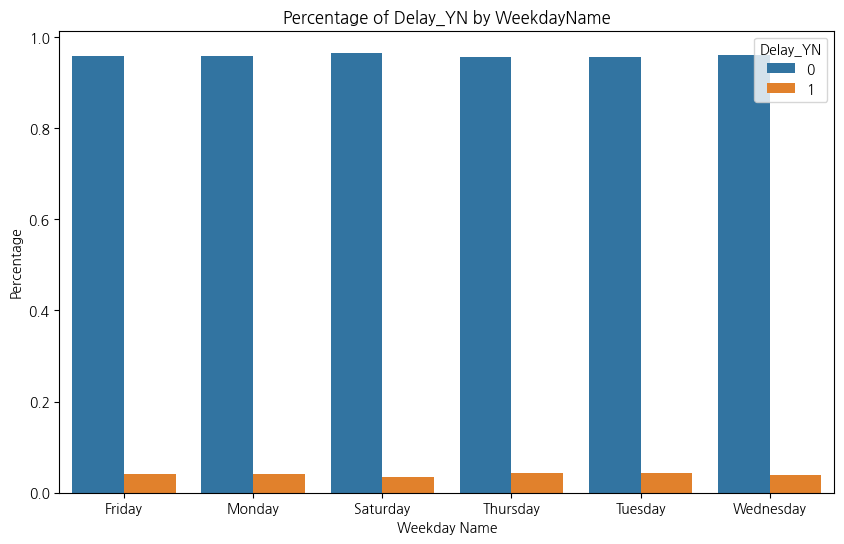

In [10]:
# Plotting the data
plt.figure(figsize=(10, 6))
sns.barplot(x="WeekdayName_Delivery", y="percentage", hue="Delay_YN", data=grouped_data)
plt.title("Percentage of Delay_YN by WeekdayName")
plt.ylabel("Percentage")
plt.xlabel("Weekday Name")

plt.show()

## 주문시간별 배송지연율

In [11]:
Hour_delay = kurly.groupby('Hour')['Delay_YN'].mean().reset_index()
Hour_delay.head()

,Hour,Delay_YN
0,0,0.036010
1,1,0.033152
2,2,0.024434
3,3,0.048292
4,4,0.034146


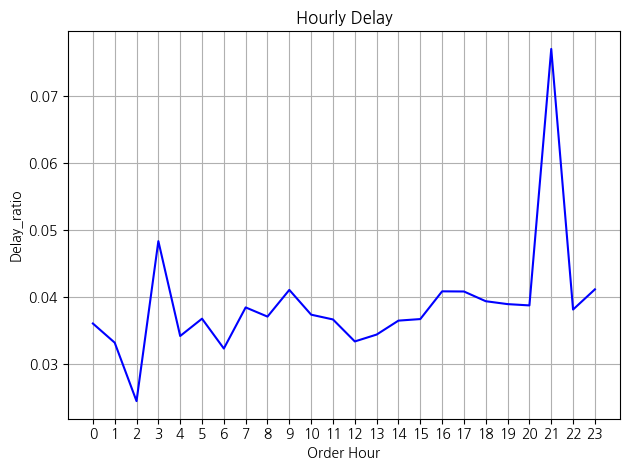

In [12]:
# 그래프 그리기
plt.plot(Hour_delay['Hour'], Hour_delay['Delay_YN'], color='b', linestyle='-')
# 그래프 제목과 축 레이블
plt.title('Hourly Delay')
plt.xlabel('Order Hour')
plt.ylabel('Delay_ratio')
# 그래프 보여주기
plt.grid(True)
plt.xticks(range(24))  # x축 눈금을 시간대로 설정
plt.tight_layout()
plt.show()

- 21~22시 주문할 경우 배송지연율이 약 7.7 %로 타 시간대보다 매우 높음
- 왜?


In [13]:
# Delivery_hour 추가
kurly['Delivery_Hour'] = kurly['DeliveryDT'].dt.hour
kurly.head()

,idUser,idOrder,OrderDT,ItemCode,Price,DeliveryDT,Delay_YN,ItemLargeCode,ItemLargeName,ItemMiddleCode,...,CleanedItemName,TimeBetweenOrders,Combined,Weekday,WeekdayName,Date_Delivery,Delivery_diff_Order,Weekday_Delivery,WeekdayName_Delivery,Delivery_Hour
0,U10001,U10001-O2021-1001,2021-12-03 20:59:27,L1-M12-S0070-1113,17030,2021-12-04 03:26:00,0,L1,가공식품,M12,...,이츠웰 후르츠칵테일 과일통조림 3k 슬라이스,3 days 09:06:40,"20s, 여성, 2",4,Friday,2021-12-04,1 days,5,Saturday,3
1,U10001,U10001-O2021-1001,2021-12-03 20:59:27,L1-M15-S0140-1247,7680,2021-12-04 03:26:00,0,L1,가공식품,M15,...,베지가든 수제교자만두 매콤한 김치맛 720g 360gx2개입,3 days 09:06:40,"20s, 여성, 2",4,Friday,2021-12-04,1 days,5,Saturday,3
2,U10001,U10001-O2021-1001,2021-12-03 20:59:27,L1-M23-S0580-1047,12420,2021-12-04 03:26:00,0,L1,가공식품,M23,...,매일유업 매일 상하치즈 피자용 모짜렐라 슈레드치즈 200gx5봉,3 days 09:06:40,"20s, 여성, 2",4,Friday,2021-12-04,1 days,5,Saturday,3
3,U10001,U10001-O2021-1001,2021-12-03 20:59:27,L4-M12-S0640-1010,6250,2021-12-04 03:26:00,0,L4,신선식품,M12,...,계양구 배달 싱싱한 방울토마토 750g 작전 과일나라,3 days 09:06:40,"20s, 여성, 2",4,Friday,2021-12-04,1 days,5,Saturday,3
4,U10001,U10001-O2021-1001,2021-12-03 20:59:27,L4-M17-S0130-1018,14450,2021-12-04 03:26:00,0,L4,신선식품,M17,...,낙지호롱 900g 20 25개 낙지꼬치구이 냉동낙지 양념소스70gx1팩 제공,3 days 09:06:40,"20s, 여성, 2",4,Friday,2021-12-04,1 days,5,Saturday,3


Text(0.5, 1.0, '21~22시 주문시 도착시간')

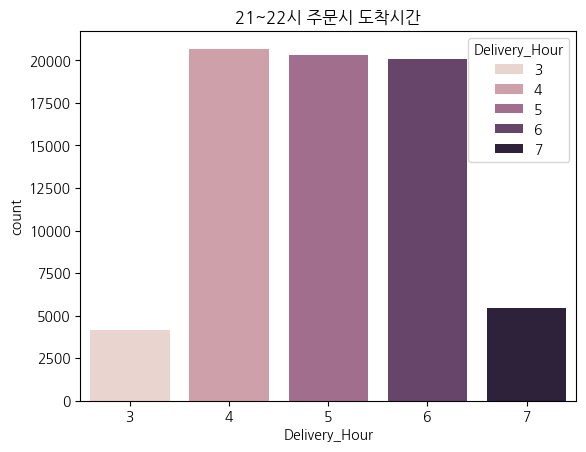

In [14]:
kurly_order_21 = kurly[kurly['Hour']==21]
sns.countplot(data = kurly_order_21, x = 'Delivery_Hour', hue = 'Delivery_Hour')
plt.title("21~22시 주문시 도착시간")

Text(0.5, 1.0, '21~22시 주문시 도착까지 걸리는 일 수')

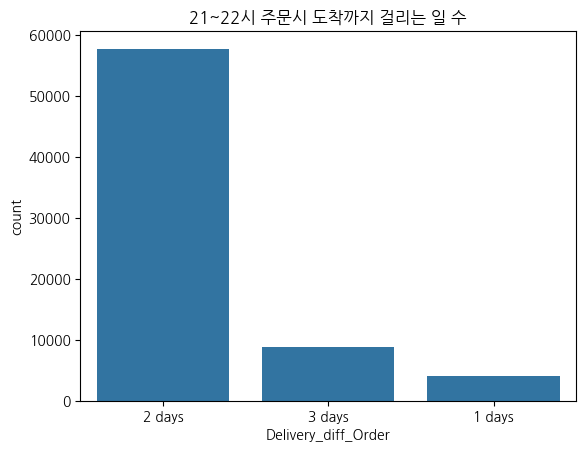

In [15]:
kurly_order_21 = kurly[kurly['Hour']==21]
sns.countplot(data = kurly_order_21, x = 'Delivery_diff_Order')
plt.title("21~22시 주문시 도착까지 걸리는 일 수")

In [16]:
# 21시 ~ 22시 주문시 도착까지 걸리는 일 수 비율
kurly_order_21['Delivery_diff_Order'].value_counts(normalize = True)

2 days    0.817115
3 days    0.125233
1 days    0.057652
Name: Delivery_diff_Order, dtype: float64

Text(0.5, 1.0, '21~22시 주문하여 배송에 2일 걸린 경우의 배송 수')

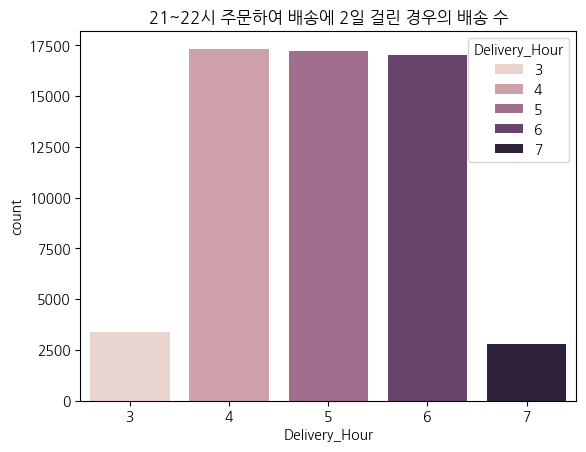

In [17]:
# 21~22시 주문하여 배송에 2일 걸린 경우의 배송지연율 plot
sns.countplot(data = kurly_order_21[kurly_order_21['Delivery_diff_Order']=='2 days'], x = 'Delivery_Hour', hue='Delivery_Hour')
plt.title("21~22시 주문하여 배송에 2일 걸린 경우의 배송 수")

In [18]:
# 21~22시 주문하여 배송에 2일 걸린 경우의 배송지연율
kurly_order_21[kurly_order_21['Delivery_diff_Order']=='2 days']['Delivery_Hour'].value_counts(normalize=True)

4    0.300087
5    0.298494
6    0.294842
3    0.058421
7    0.048156
Name: Delivery_Hour, dtype: float64

Text(0.5, 1.0, '21~22시 주문하여 배송에 1일 걸린 경우의 배송 수')

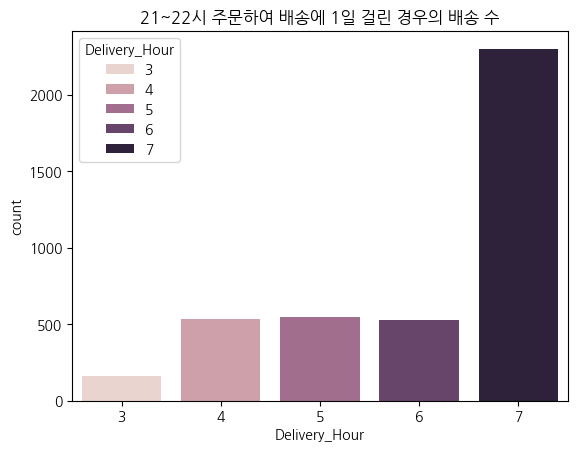

In [19]:
# 21~22시 주문하여 배송에 1일 걸린 경우의 배송지연율(약 4000개 데이터) plot
sns.countplot(data = kurly_order_21[kurly_order_21['Delivery_diff_Order']=='1 days'], x = 'Delivery_Hour', hue='Delivery_Hour')
plt.title("21~22시 주문하여 배송에 1일 걸린 경우의 배송 수")

In [20]:
# 21~22시 주문하여 배송에 1일 걸린 경우의 배송지연율(약 4000개 데이터)
kurly_order_21[kurly_order_21['Delivery_diff_Order']=='1 days']['Delivery_Hour'].value_counts(normalize=True)

7    0.565015
5    0.133955
4    0.131011
6    0.129784
3    0.040236
Name: Delivery_Hour, dtype: float64

    - 21시~22시에 주문한 경우
        - 배송에 2일이 걸릴 때 배송지연율은 약 4.8%
        - 배송에 1일이 걸릴 때 배송지연율은 약 57%
    - 21시~22시에 주문하여 바로 다음 날 배송을 하려할 때 배송 지연이 굉장히 많다.

Text(0.5, 1.0, '22시 이후 주문시 도착까지 걸리는 일 수')

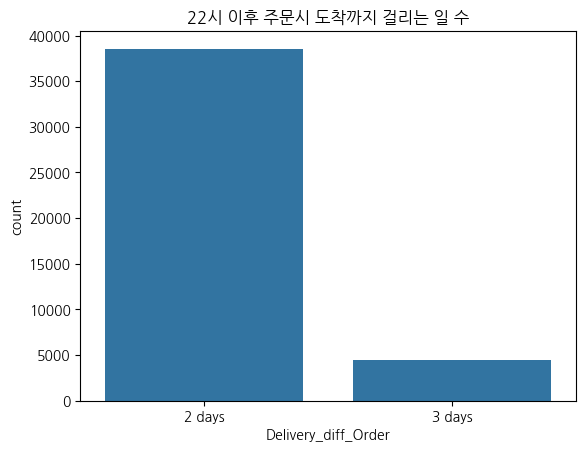

In [21]:
# 22시 이후 주문 중 바로 다음날 배송해준 건수
kurly_order_after22 = kurly[kurly['Hour']==22 | 23]
sns.countplot(data = kurly_order_after22, x = 'Delivery_diff_Order')
plt.title("22시 이후 주문시 도착까지 걸리는 일 수")

- 22시 이후 주문한 경우 모두 2일 이후 배송

- 정리
    1. 21시 ~ 22시에 주문한 경우 배송지연율 높다(약 7.7%).
    2. 우리 회사는 21시 전 주문 건만 익일새벽배송이 원칙.
    3. 21시 ~ 22시에 주문한 것 중 익일새벽배송이 존재(약 5.8%)
    4. 21시 ~ 22시에 주문한 것이 익일새벽배송일 때 배송지연율이 높음(약 57%)
    5. 21시 이후 주문에 대하여 익일새벽배송을 하려고 할 때의 프로세스 개선이 필요

In [22]:
kurly['CleanedItemName'].head()

0                        이츠웰 후르츠칵테일 과일통조림 3k 슬라이스
1             베지가든 수제교자만두 매콤한 김치맛 720g  360gx2개입 
2             매일유업 매일 상하치즈 피자용 모짜렐라 슈레드치즈 200gx5봉
3                계양구 배달  싱싱한 방울토마토 750g  작전 과일나라 
4    낙지호롱 900g 20 25개 낙지꼬치구이 냉동낙지  양념소스70gx1팩 제공 
Name: CleanedItemName, dtype: object

## 시간대별 도착건수

In [23]:
kurly.head()

,idUser,idOrder,OrderDT,ItemCode,Price,DeliveryDT,Delay_YN,ItemLargeCode,ItemLargeName,ItemMiddleCode,...,CleanedItemName,TimeBetweenOrders,Combined,Weekday,WeekdayName,Date_Delivery,Delivery_diff_Order,Weekday_Delivery,WeekdayName_Delivery,Delivery_Hour
0,U10001,U10001-O2021-1001,2021-12-03 20:59:27,L1-M12-S0070-1113,17030,2021-12-04 03:26:00,0,L1,가공식품,M12,...,이츠웰 후르츠칵테일 과일통조림 3k 슬라이스,3 days 09:06:40,"20s, 여성, 2",4,Friday,2021-12-04,1 days,5,Saturday,3
1,U10001,U10001-O2021-1001,2021-12-03 20:59:27,L1-M15-S0140-1247,7680,2021-12-04 03:26:00,0,L1,가공식품,M15,...,베지가든 수제교자만두 매콤한 김치맛 720g 360gx2개입,3 days 09:06:40,"20s, 여성, 2",4,Friday,2021-12-04,1 days,5,Saturday,3
2,U10001,U10001-O2021-1001,2021-12-03 20:59:27,L1-M23-S0580-1047,12420,2021-12-04 03:26:00,0,L1,가공식품,M23,...,매일유업 매일 상하치즈 피자용 모짜렐라 슈레드치즈 200gx5봉,3 days 09:06:40,"20s, 여성, 2",4,Friday,2021-12-04,1 days,5,Saturday,3
3,U10001,U10001-O2021-1001,2021-12-03 20:59:27,L4-M12-S0640-1010,6250,2021-12-04 03:26:00,0,L4,신선식품,M12,...,계양구 배달 싱싱한 방울토마토 750g 작전 과일나라,3 days 09:06:40,"20s, 여성, 2",4,Friday,2021-12-04,1 days,5,Saturday,3
4,U10001,U10001-O2021-1001,2021-12-03 20:59:27,L4-M17-S0130-1018,14450,2021-12-04 03:26:00,0,L4,신선식품,M17,...,낙지호롱 900g 20 25개 낙지꼬치구이 냉동낙지 양념소스70gx1팩 제공,3 days 09:06:40,"20s, 여성, 2",4,Friday,2021-12-04,1 days,5,Saturday,3


In [24]:
kurly['DeliveryHM'] = kurly['DeliveryDT'].apply(lambda x: x.strftime('%H:%M'))

In [25]:
delivery_time = kurly.groupby('DeliveryHM')['idOrder'].count().reset_index()

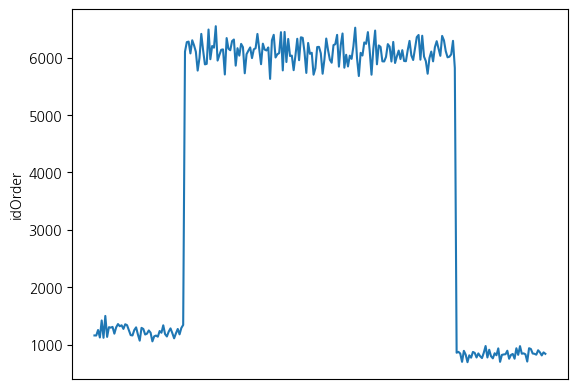

In [26]:
sns.lineplot(data = delivery_time, x = 'DeliveryHM', y='idOrder')
plt.gca().axes.xaxis.set_visible(False)

In [27]:
kurly.head()

,idUser,idOrder,OrderDT,ItemCode,Price,DeliveryDT,Delay_YN,ItemLargeCode,ItemLargeName,ItemMiddleCode,...,TimeBetweenOrders,Combined,Weekday,WeekdayName,Date_Delivery,Delivery_diff_Order,Weekday_Delivery,WeekdayName_Delivery,Delivery_Hour,DeliveryHM
0,U10001,U10001-O2021-1001,2021-12-03 20:59:27,L1-M12-S0070-1113,17030,2021-12-04 03:26:00,0,L1,가공식품,M12,...,3 days 09:06:40,"20s, 여성, 2",4,Friday,2021-12-04,1 days,5,Saturday,3,03:26
1,U10001,U10001-O2021-1001,2021-12-03 20:59:27,L1-M15-S0140-1247,7680,2021-12-04 03:26:00,0,L1,가공식품,M15,...,3 days 09:06:40,"20s, 여성, 2",4,Friday,2021-12-04,1 days,5,Saturday,3,03:26
2,U10001,U10001-O2021-1001,2021-12-03 20:59:27,L1-M23-S0580-1047,12420,2021-12-04 03:26:00,0,L1,가공식품,M23,...,3 days 09:06:40,"20s, 여성, 2",4,Friday,2021-12-04,1 days,5,Saturday,3,03:26
3,U10001,U10001-O2021-1001,2021-12-03 20:59:27,L4-M12-S0640-1010,6250,2021-12-04 03:26:00,0,L4,신선식품,M12,...,3 days 09:06:40,"20s, 여성, 2",4,Friday,2021-12-04,1 days,5,Saturday,3,03:26
4,U10001,U10001-O2021-1001,2021-12-03 20:59:27,L4-M17-S0130-1018,14450,2021-12-04 03:26:00,0,L4,신선식품,M17,...,3 days 09:06:40,"20s, 여성, 2",4,Friday,2021-12-04,1 days,5,Saturday,3,03:26


## 신규고객

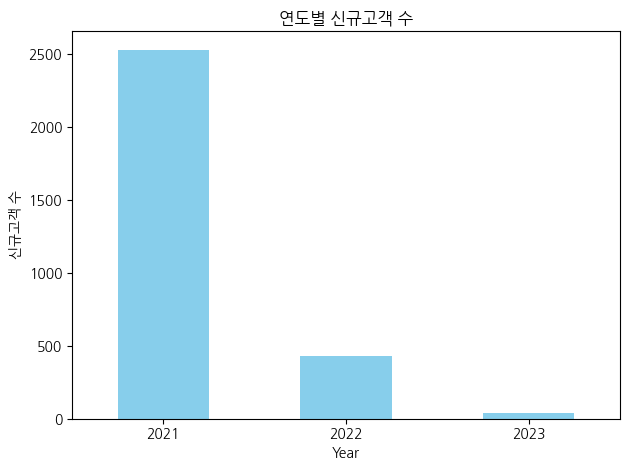

In [28]:
### 신규고객 수 그래프
first_order = kurly[['idUser','OrderDT','Year']].sort_values(['idUser','OrderDT'])
first_order.drop_duplicates('idUser', inplace = True)
# Year 별로 idUser의 수를 계산
user_count_by_year = first_order.groupby('Year')['idUser'].count()
# 그래프 그리기
user_count_by_year.plot(kind='bar', color='skyblue')
plt.title('연도별 신규고객 수')
plt.xlabel('Year')
plt.ylabel('신규고객 수')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

In [29]:
user_count_by_year

Year
2021    2532
2022     431
2023      37
Name: idUser, dtype: int64

In [30]:
###신규고객 감소율
user_count_by_year = pd.DataFrame(user_count_by_year)
user_count_by_year.rename(columns={'idUser': 'Value'}, inplace=True)
# 이전 연도 값
previous_year_value = user_count_by_year['Value'].shift(1)
# 감소율 계산
decrease_rate = ((previous_year_value - user_count_by_year['Value']) / previous_year_value) * 100
# 결과 출력
decrease_rate.dropna(inplace=True)  # 첫 번째 행은 비교할 이전 연도 값이 없으므로 삭제
print(decrease_rate)

Year
2022    82.977883
2023    91.415313
Name: Value, dtype: float64


In [35]:
LastOrder = kurly.groupby("idUser")['OrderDT'].max().reset_index()
LastOrder

,idUser,OrderDT
0,U10001,2023-12-27 08:25:54
1,U10002,2023-12-06 10:16:48
2,U10003,2023-12-23 21:09:58
3,U10004,2023-12-05 20:24:04
4,U10005,2023-11-20 12:40:36
...,...,...
2995,U12996,2023-12-29 18:56:12
2996,U12997,2023-12-26 20:27:53
2997,U12998,2023-11-27 19:51:55
2998,U12999,2023-12-27 10:22:26


## 이탈고객 수

In [41]:
### 이탈고객수
last_order = kurly[['idUser','OrderDT','Year','Month','Day']].sort_values(['idUser','OrderDT'])
last_order.drop_duplicates('idUser', inplace = True, keep = 'last')
#100일전 2023년 9월 22일 기준
last_order[last_order['OrderDT'] < '2023-09-22']
#12명;;

,idUser,OrderDT,Year,Month,Day
52768,U10157,2023-08-23 09:02:16,2023,8,23
102567,U10301,2023-09-19 20:23:01,2023,9,19
171339,U10508,2023-09-20 11:24:49,2023,9,20
176393,U10525,2023-09-18 16:35:40,2023,9,18
289902,U10860,2023-06-21 21:46:29,2023,6,21
477577,U11411,2023-08-23 09:54:47,2023,8,23
547426,U11614,2023-08-24 20:54:41,2023,8,24
578575,U11703,2023-09-18 22:31:00,2023,9,18
825667,U12432,2023-09-06 06:27:14,2023,9,6
855709,U12524,2023-09-04 20:05:16,2023,9,4


# RFM (고객 세분화 분석)

In [42]:
# 원본 데이터셋 복사
rfm_online_sales =  kurly.copy()

# 데이터 내 마지막 날짜 계산
last_date = rfm_online_sales['OrderDT'].max()

In [43]:
# Recency 계산
recency_data = rfm_online_sales.groupby('idUser')['OrderDT'].max().reset_index()
recency_data['Recency'] = (last_date - recency_data['OrderDT']).dt.days
recency_data

,idUser,OrderDT,Recency
0,U10001,2023-12-27 08:25:54,4
1,U10002,2023-12-06 10:16:48,25
2,U10003,2023-12-23 21:09:58,8
3,U10004,2023-12-05 20:24:04,26
4,U10005,2023-11-20 12:40:36,41
...,...,...,...
2995,U12996,2023-12-29 18:56:12,2
2996,U12997,2023-12-26 20:27:53,5
2997,U12998,2023-11-27 19:51:55,34
2998,U12999,2023-12-27 10:22:26,4


In [44]:
# Frequency 계산
frequency_data = rfm_online_sales.groupby('idUser')['idOrder'].nunique().reset_index()
frequency_data.rename(columns={'idOrder': 'Frequency'}, inplace=True)
frequency_data

,idUser,Frequency
0,U10001,69
1,U10002,54
2,U10003,53
3,U10004,33
4,U10005,79
...,...,...
2995,U12996,20
2996,U12997,67
2997,U12998,56
2998,U12999,55


In [45]:
rfm_online_sales.head()

,idUser,idOrder,OrderDT,ItemCode,Price,DeliveryDT,Delay_YN,ItemLargeCode,ItemLargeName,ItemMiddleCode,...,TimeBetweenOrders,Combined,Weekday,WeekdayName,Date_Delivery,Delivery_diff_Order,Weekday_Delivery,WeekdayName_Delivery,Delivery_Hour,DeliveryHM
0,U10001,U10001-O2021-1001,2021-12-03 20:59:27,L1-M12-S0070-1113,17030,2021-12-04 03:26:00,0,L1,가공식품,M12,...,3 days 09:06:40,"20s, 여성, 2",4,Friday,2021-12-04,1 days,5,Saturday,3,03:26
1,U10001,U10001-O2021-1001,2021-12-03 20:59:27,L1-M15-S0140-1247,7680,2021-12-04 03:26:00,0,L1,가공식품,M15,...,3 days 09:06:40,"20s, 여성, 2",4,Friday,2021-12-04,1 days,5,Saturday,3,03:26
2,U10001,U10001-O2021-1001,2021-12-03 20:59:27,L1-M23-S0580-1047,12420,2021-12-04 03:26:00,0,L1,가공식품,M23,...,3 days 09:06:40,"20s, 여성, 2",4,Friday,2021-12-04,1 days,5,Saturday,3,03:26
3,U10001,U10001-O2021-1001,2021-12-03 20:59:27,L4-M12-S0640-1010,6250,2021-12-04 03:26:00,0,L4,신선식품,M12,...,3 days 09:06:40,"20s, 여성, 2",4,Friday,2021-12-04,1 days,5,Saturday,3,03:26
4,U10001,U10001-O2021-1001,2021-12-03 20:59:27,L4-M17-S0130-1018,14450,2021-12-04 03:26:00,0,L4,신선식품,M17,...,3 days 09:06:40,"20s, 여성, 2",4,Friday,2021-12-04,1 days,5,Saturday,3,03:26


In [46]:
# Monetary 계산
monetary_data = rfm_online_sales.groupby('idUser')['Price'].sum().reset_index()
monetary_data.rename(columns={'Price': 'Monetary'}, inplace=True)
monetary_data

,idUser,Monetary
0,U10001,5968480
1,U10002,4595890
2,U10003,5110930
3,U10004,2641890
4,U10005,6920530
...,...,...
2995,U12996,2256990
2996,U12997,5999100
2997,U12998,5318240
2998,U12999,5321330


In [47]:
# RFM 데이터 결합
rfm_data = recency_data.merge(frequency_data, on='idUser').merge(monetary_data, on='idUser')

# Recency, Frequency, Monetary에 점수 부여
rfm_data['R_Score'] = pd.qcut(rfm_data['Recency'], 4, labels=[4, 3, 2, 1])
rfm_data['F_Score'] = pd.qcut(rfm_data['Frequency'], 4, labels=[1, 2, 3, 4])
rfm_data['M_Score'] = pd.qcut(rfm_data['Monetary'], 4, labels=[1, 2, 3, 4])

# RFM 스코어 계산
rfm_data['RFM_Score'] = rfm_data['R_Score'].astype(str) + rfm_data['F_Score'].astype(str) + rfm_data['M_Score'].astype(str)

In [48]:
# 고객 세그먼트 분류 함수
def classify_customer_segment(row):
    R, F, M = row['R_Score'], row['F_Score'], row['M_Score']

    if R == 4 and F == 4 and M == 4:
        return 'VIP고객'
    elif R >= 2 and F >= 3 and M == 4:
        return '충성고객'
    elif R >= 3 and F <= 3 and M <= 3:
        return '잠재충성고객'
    elif R == 2 and F < 2 and M < 2:
        return '신규고객'
    elif R >= 3 and F < 2 and M < 2:
        return '정체고객'
    elif R >= 3 and F >= 3 and M >= 3:
        return '관심필요고객'
    elif 2 <= R <= 3 and F < 3 and M < 3:
        return '잠드려는고객'
    elif R < 3 and 2 <= F <= 4 and 2 <= M <= 4:
        return '이탈우려고객'
    elif R < 2 and F == 4 and M == 4:
        return '놓치면안될고객'
    elif 2 <= R <= 3 and 2 <= F <= 3 and 2 <= M <= 3:
        return '겨울잠고객'
    elif R < 2 and F < 2 and M < 2:
        return '이탈고객'
    else:
        return '기타'


In [49]:
# rfm_data에 'Customer_Segment' 컬럼 추가
rfm_data['Customer_Segment'] = rfm_data.apply(classify_customer_segment, axis=1)

# 가능한 모든 세그먼트 정의
all_segments = ['VIP고객', '충성고객', '잠재충성고객', '신규고객', '정체고객', '관심필요고객',
                '잠드려는고객', '이탈우려고객', '놓치면안될고객', '겨울잠고객', '이탈고객', '기타']

# 각 세그먼트별 고객 수 계산
segment_counts = rfm_data['Customer_Segment'].value_counts()

# 모든 세그먼트에 대한 고객 수를 0으로 초기화하고, 계산된 값으로 업데이트
segment_counts_all = {segment: 0 for segment in all_segments}
segment_counts_all.update(segment_counts)

# 데이터프레임으로 변환
segment_counts_df = pd.DataFrame(list(segment_counts_all.items()), columns=['Segment', 'Count'])

segment_counts_df.sort_values(by='Count', ascending=False)

,Segment,Count
2,잠재충성고객,1087
7,이탈우려고객,698
1,충성고객,407
0,VIP고객,202
10,이탈고객,176
6,잠드려는고객,169
3,신규고객,157
11,기타,53
5,관심필요고객,51
4,정체고객,0


In [54]:
segment_counts_sorted_df

,Segment,Count
2,잠재충성고객,1087
7,이탈우려고객,698
1,충성고객,407
0,VIP고객,202
10,이탈고객,176
6,잠드려는고객,169
3,신규고객,157
11,기타,53
5,관심필요고객,51
4,정체고객,0


<ipython-input-103-052f399527a7>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=segment_counts_sorted_df, x= 'Segment', y='Count', palette = palette)


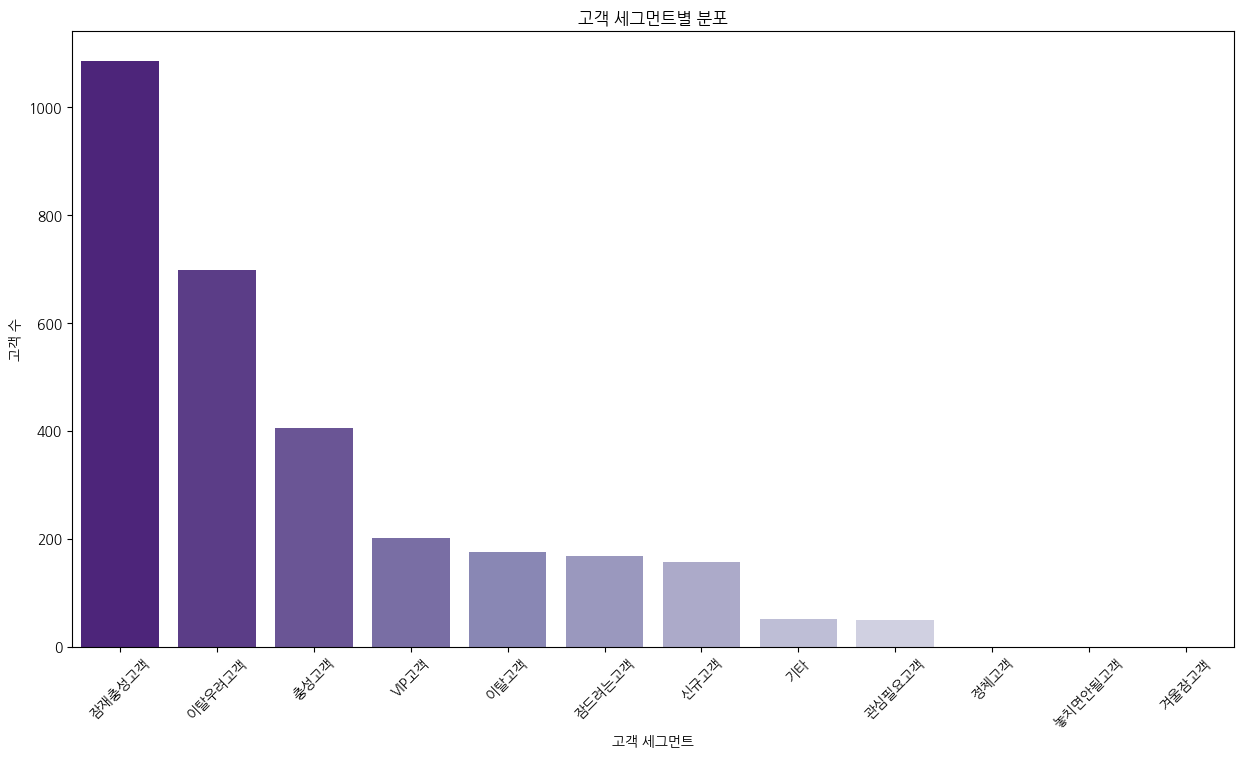

In [103]:
# 세그먼트별 고객 수를 내림차순으로 정렬
segment_counts_sorted_df = segment_counts_df.sort_values(by='Count', ascending=False)

palette = sns.color_palette('Purples', len(segment_counts_sorted_df))
palette.reverse()

# 바 그래프 시각화
plt.figure(figsize=(15, 8))
sns.barplot(data=segment_counts_sorted_df, x= 'Segment', y='Count', palette = palette)
plt.title('고객 세그먼트별 분포')
plt.xlabel('고객 세그먼트')
plt.ylabel('고객 수')
plt.xticks(rotation=45)
plt.show()



In [51]:
rfm_data.head()

,idUser,OrderDT,Recency,Frequency,Monetary,R_Score,F_Score,M_Score,RFM_Score,Customer_Segment
0,U10001,2023-12-27 08:25:54,4,69,5968480,4,4,4,444,VIP고객
1,U10002,2023-12-06 10:16:48,25,54,4595890,1,2,1,121,기타
2,U10003,2023-12-23 21:09:58,8,53,5110930,3,2,2,322,잠재충성고객
3,U10004,2023-12-05 20:24:04,26,33,2641890,1,1,1,111,이탈고객
4,U10005,2023-11-20 12:40:36,41,79,6920530,1,4,4,144,이탈우려고객


In [104]:
df = pd.merge(kurly, rfm_data[['idUser','Customer_Segment']], on='idUser', how='left')
df.drop_duplicates('idUser', inplace=True)

In [105]:
df.columns

Index(['idUser', 'idOrder', 'OrderDT', 'ItemCode', 'Price', 'DeliveryDT',
       'Delay_YN', 'ItemLargeCode', 'ItemLargeName', 'ItemMiddleCode',
       'ItemMiddleName', 'ItemSmallCode', 'ItemSmallName', 'ItemName',
       'Gender', 'Age', 'FamilyCount', 'MemberYN', 'AgeGroup', 'Date', 'Year',
       'Month', 'Day', 'Hour', 'CleanedItemName', 'TimeBetweenOrders',
       'Combined', 'Weekday', 'WeekdayName', 'Date_Delivery',
       'Delivery_diff_Order', 'Weekday_Delivery', 'WeekdayName_Delivery',
       'Delivery_Hour', 'DeliveryHM', 'Customer_Segment'],
      dtype='object')

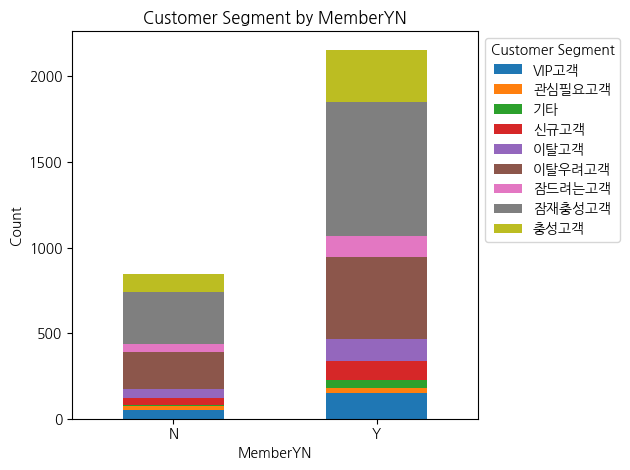

In [106]:
# MemberYN 별 Customer_Segment 빈도 계산
segment_counts = df.groupby(['MemberYN', 'Customer_Segment']).size().unstack()

# 그래프 그리기
segment_counts.plot(kind='bar', stacked=True)
plt.title('Customer Segment by MemberYN')
plt.xlabel('MemberYN')
plt.ylabel('Count')
plt.xticks(rotation=0)  # x축 레이블 회전
plt.legend(title='Customer Segment', bbox_to_anchor=(1, 1))
plt.tight_layout()
plt.show()

In [ ]:
segment_counts

Customer_Segment,VIP고객,관심필요고객,기타,신규고객,이탈고객,이탈우려고객,잠드려는고객,잠재충성고객,충성고객
MemberYN,,,,,,,,,
N,22739,7311,3010,10196,12409,78710,14732,95545,42918
Y,63111,12318,13121,28159,30615,175875,39798,243911,124437


In [72]:
kurly.head()

,idUser,idOrder,OrderDT,ItemCode,Price,DeliveryDT,Delay_YN,ItemLargeCode,ItemLargeName,ItemMiddleCode,...,TimeBetweenOrders,Combined,Weekday,WeekdayName,Date_Delivery,Delivery_diff_Order,Weekday_Delivery,WeekdayName_Delivery,Delivery_Hour,DeliveryHM
0,U10001,U10001-O2021-1001,2021-12-03 20:59:27,L1-M12-S0070-1113,17030,2021-12-04 03:26:00,0,L1,가공식품,M12,...,3 days 09:06:40,"20s, 여성, 2",4,Friday,2021-12-04,1 days,5,Saturday,3,03:26
1,U10001,U10001-O2021-1001,2021-12-03 20:59:27,L1-M15-S0140-1247,7680,2021-12-04 03:26:00,0,L1,가공식품,M15,...,3 days 09:06:40,"20s, 여성, 2",4,Friday,2021-12-04,1 days,5,Saturday,3,03:26
2,U10001,U10001-O2021-1001,2021-12-03 20:59:27,L1-M23-S0580-1047,12420,2021-12-04 03:26:00,0,L1,가공식품,M23,...,3 days 09:06:40,"20s, 여성, 2",4,Friday,2021-12-04,1 days,5,Saturday,3,03:26
3,U10001,U10001-O2021-1001,2021-12-03 20:59:27,L4-M12-S0640-1010,6250,2021-12-04 03:26:00,0,L4,신선식품,M12,...,3 days 09:06:40,"20s, 여성, 2",4,Friday,2021-12-04,1 days,5,Saturday,3,03:26
4,U10001,U10001-O2021-1001,2021-12-03 20:59:27,L4-M17-S0130-1018,14450,2021-12-04 03:26:00,0,L4,신선식품,M17,...,3 days 09:06:40,"20s, 여성, 2",4,Friday,2021-12-04,1 days,5,Saturday,3,03:26


In [80]:
kurly.columns

Index(['idUser', 'idOrder', 'OrderDT', 'ItemCode', 'Price', 'DeliveryDT',
       'Delay_YN', 'ItemLargeCode', 'ItemLargeName', 'ItemMiddleCode',
       'ItemMiddleName', 'ItemSmallCode', 'ItemSmallName', 'ItemName',
       'Gender', 'Age', 'FamilyCount', 'MemberYN', 'AgeGroup', 'Date', 'Year',
       'Month', 'Day', 'Hour', 'CleanedItemName', 'TimeBetweenOrders',
       'Combined', 'Weekday', 'WeekdayName', 'Date_Delivery',
       'Delivery_diff_Order', 'Weekday_Delivery', 'WeekdayName_Delivery',
       'Delivery_Hour', 'DeliveryHM'],
      dtype='object')